In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import copy
import numpy as np
import pandas as pd
import json
import pickle
import sklearn
import scipy
from pandasql import *
from pandasql import sqldf
from datetime import datetime
from pandas.io.json import json_normalize
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from collections import OrderedDict
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize, scale
from statsmodels.regression.linear_model import OLS as reg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
plt.rcParams['figure.figsize'] = 9,7

In [399]:
def rmse(Y_test,Y_pred):   
    return np.sqrt(sklearn.metrics.mean_squared_error(Y_test,Y_pred))

In [400]:
from pandasql import sqldf
sql = lambda q: sqldf(q, globals()) 

In [5]:
zzz='''
Jupyter Notebook key shortcuts:
<br>                            newline
**text**                        bold
# text, ## text, ### text       heading
_text_                          italicize
+ text                          bullet

m                               markdown 
y                               code
c                               copy   
v                               paste
b                               insert cell below
a                               insert cell above 

File Location '/Users/Work/Desktop/Work/Projects/Wine'
'''

# Data Dictionary
**INDEX**:  Identification Variable (do not use)<br>
**TARGET**: Number of Cases Purchased
	
**AcidIndex**: Proprietary method of testing total acidity of wine by using a weighted average<br>
**Alcohol**: Alcohol Content<br>
**Chlorides**: Chloride content of wine<br>
**CitricAcid**: Citric Acid Content<br>
**Density**: of Wine<br>
**FixedAcidity**: Fixed Acidity of Wine<br>
**FreeSulfurDioxide**: Sulfur Dioxide content of wine<br>
**LabelAppeal**: Marketing Score indicating the appeal of label design for consumers. High numbers suggest customers like the label design. Negative numbers suggest customes don't like the design.<br>
**ResidualSugar**: Residual Sugar of wine<br>
**STARS**: Wine rating by a team of experts. 4 Stars = Excellent, 1 Star = Poor<br>
**Sulphates**: Sulfate conten of wine<br>
**TotalSulfurDioxide**: Total Sulfur Dioxide of Wine<br>
**VolatileAcidity**: Volatile Acid content of wine<br>
**pH**: pH of wine

# Exploratory Data Analysis

In [401]:
wine=pd.read_csv('/Users/Work/Desktop/Work/Projects/Wine/wine.csv')

In [402]:
wine.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [403]:
#We don't need the index column and sql lite will get confused by it.
wine=wine.drop('INDEX',axis=1)

In [404]:
#(observations, columns)
wine.shape

(12795, 15)

In [405]:
winetable.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [406]:
# range of values, notice that 3 variables have large ranges, and as shown in the correlation 
#table, have low correlations (trimming them might be to our advantage, then).
wine.max()-wine.min()

TARGET                8.00000   
FixedAcidity          52.50000  
VolatileAcidity       6.47000   
CitricAcid            7.10000   
ResidualSugar         268.95000 
Chlorides             2.52200   
FreeSulfurDioxide     1178.00000
TotalSulfurDioxide    1880.00000
Density               0.21115   
pH                    5.65000   
Sulphates             7.37000   
Alcohol               31.20000  
LabelAppeal           4.00000   
AcidIndex             13.00000  
STARS                 3.00000   
dtype: float64

In [407]:
wine.TARGET.value_counts()

4    3177
0    2734
3    2611
5    2014
2    1091
6    765 
1    244 
7    142 
8    17  
Name: TARGET, dtype: int64

In [408]:
#Using SQL to do the above (takes longer)
q='''
SELECT TARGET, COUNT(*) AS COUNT
FROM wine
GROUP BY TARGET
ORDER BY COUNT DESC
'''
sql(q)

,TARGET,COUNT
0,4.0,3177
1,0.0,2734
2,3.0,2611
3,5.0,2014
4,2.0,1091
5,6.0,765
6,1.0,244
7,7.0,142
8,8.0,17


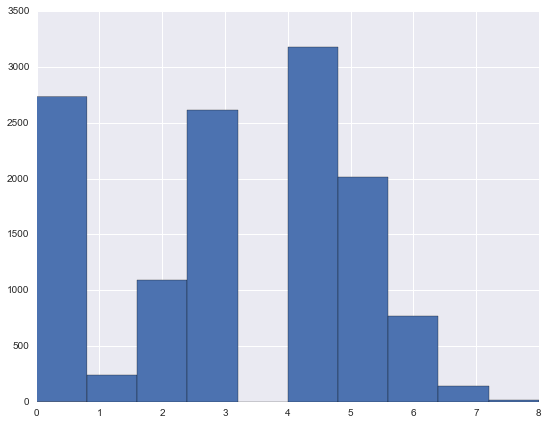

In [409]:
wine.TARGET.hist()

## Missing Values

In [410]:
#Count of missing values
wine.isnull().sum(axis=0)

TARGET                0   
FixedAcidity          0   
VolatileAcidity       0   
CitricAcid            0   
ResidualSugar         616 
Chlorides             638 
FreeSulfurDioxide     647 
TotalSulfurDioxide    682 
Density               0   
pH                    395 
Sulphates             1210
Alcohol               653 
LabelAppeal           0   
AcidIndex             0   
STARS                 3359
dtype: int64

In [424]:
wine_flag=copy.deepcopy(wine)
X_Vars=list(X.columns.values)[1:]
for j in X_Vars:
    if wine_flag[j].isnull().any()==True:
        wine_flag['m_'+j]=wine_flag[j].isnull()*1 

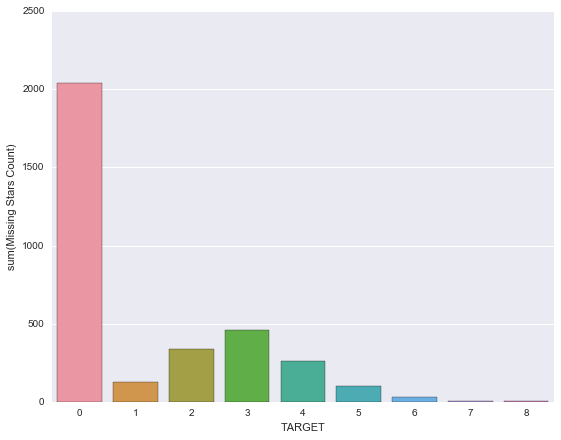

In [426]:
#Investigating number of missing values for each TARGET value using SQL, pandas, 
#and the seaborn visualization library
q='''
select count(m_stars) Count
from wine_flag 
where m_stars=1
group by target
'''
missing_stars=sql(q)
missing_stars.columns=['Missing Stars Count']
missing_stars.index.name='TARGET'
missing_stars=missing_stars.reset_index()
sns.barplot(x='TARGET',y='Missing Stars Count', data=missing_stars,estimator=sum)

In [427]:
q='''
SELECT target, AVG(STARS) 
FROM wine
GROUP BY target
'''
avgstars=pd.DataFrame({'TARGET':sql(q)['TARGET'].values,'AVG(STARS)':\
                       np.round(sql(q)['AVG(STARS)'].values,1)})
avgstars[['TARGET','AVG(STARS)']]

,TARGET,AVG(STARS)
0,0.0,1.1
1,1.0,1.2
2,2.0,1.4
3,3.0,1.7
4,4.0,2.1
5,5.0,2.5
6,6.0,2.9
7,7.0,3.4
8,8.0,3.7


## Correlations

In [428]:
pd.set_option('display.max_columns', None)  #set max number of columns to None

In [368]:
'''
Correlation levels
very weak 0 - .2
weak .2 - .4
moderate .4 - .6
strong .6 - .8
very strong .8 - 1
'''
wine_flag.corr()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,m_ResidualSugar,m_Chlorides,m_FreeSulfurDioxide,m_TotalSulfurDioxide,m_pH,m_Sulphates,m_Alcohol,m_STARS
TARGET,1.000000,-0.049011,-0.088793,0.008685,0.016491,-0.038263,0.043824,0.051478,-0.035518,-0.009445,-0.038850,0.062062,0.356500,-0.246049,0.558794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FixedAcidity,-0.049011,1.000000,0.012375,0.014240,-0.018855,-0.000457,0.004972,-0.022498,0.006477,-0.008983,0.030783,-0.009371,-0.003366,0.178437,-0.006628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VolatileAcidity,-0.088793,0.012375,1.000000,-0.016953,-0.006483,0.000987,-0.007077,-0.021080,0.014735,0.013592,0.000129,0.004073,-0.016987,0.044642,-0.034431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CitricAcid,0.008685,0.014240,-0.016953,1.000000,-0.006940,-0.008567,0.006428,0.006320,-0.013952,-0.008709,-0.012989,0.017046,0.008650,0.065697,0.000665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ResidualSugar,0.016491,-0.018855,-0.006483,-0.006940,1.000000,-0.005594,0.017493,0.022479,0.004101,0.012118,-0.007723,-0.019998,0.002320,-0.009414,0.016741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlorides,-0.038263,-0.000457,0.000987,-0.008567,-0.005594,1.000000,-0.020661,-0.013994,0.022657,-0.017605,-0.003290,-0.019695,0.010509,0.025238,-0.004931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FreeSulfurDioxide,0.043824,0.004972,-0.007077,0.006428,0.017493,-0.020661,1.000000,0.013720,0.003176,0.006049,0.011593,-0.018588,0.010294,-0.041717,-0.009082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalSulfurDioxide,0.051478,-0.022498,-0.021080,0.006320,0.022479,-0.013994,0.013720,1.000000,0.012816,-0.004343,-0.007133,-0.015957,-0.009747,-0.049311,0.013929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Density,-0.035518,0.006477,0.014735,-0.013952,0.004101,0.022657,0.003176,0.012816,1.000000,0.005768,-0.009059,-0.007215,-0.009370,0.040413,-0.018284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pH,-0.009445,-0.008983,0.013592,-0.008709,0.012118,-0.017605,0.006049,-0.004343,0.005768,1.000000,0.005475,-0.011548,0.004138,-0.058676,-0.000488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [429]:
pd.reset_option('display.max_columns') #reset max cols such that width of df is auto-detected and sometimes truncated

## Median Imputation for Missing Values

In [433]:
Y=wine_flag.TARGET
X1=wine_flag.drop(['TARGET'],axis=1)
fill_NaN = Imputer(missing_values=np.nan, strategy='median', axis=1)
X = pd.DataFrame(fill_NaN.fit_transform(X1))
X.columns = X1.columns
X.index = X1.index

In [435]:
#Missing value count after mean imputation
X.isnull().sum(axis=0)

FixedAcidity            0
VolatileAcidity         0
CitricAcid              0
ResidualSugar           0
Chlorides               0
FreeSulfurDioxide       0
TotalSulfurDioxide      0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
LabelAppeal             0
AcidIndex               0
STARS                   0
m_ResidualSugar         0
m_Chlorides             0
m_FreeSulfurDioxide     0
m_TotalSulfurDioxide    0
m_pH                    0
m_Sulphates             0
m_Alcohol               0
m_STARS                 0
dtype: int64

## Trimming the outliers

In [629]:
for j in range(14):
    p01=X.iloc[:,j].quantile(.01)
    p99=X.iloc[:,j].quantile(.99)
    trim=lambda x: p01 if x<p01 else p99 if x>p99 else x
    X.iloc[:,j]=X.iloc[:,j].map(trim)

In [630]:
#Change LabelAppeal back 
Xorig = pd.DataFrame(fill_NaN.fit_transform(X1))
Xorig.columns, Xorig.index = X1.columns, X1.index
X['LabelAppeal']=Xorig['LabelAppeal']

In [631]:
#The average change for each variable
(X-Xorig).mean()

FixedAcidity           -0.001591
VolatileAcidity         0.000722
CitricAcid             -0.000734
ResidualSugar          -0.006423
Chlorides               0.000340
FreeSulfurDioxide       0.049971
TotalSulfurDioxide     -0.147912
Density                -0.000009
pH                     -0.001735
Sulphates              -0.000367
Alcohol                -0.004875
LabelAppeal             0.000000
AcidIndex              -0.001954
STARS                   0.000000
m_ResidualSugar         0.000000
m_Chlorides             0.000000
m_FreeSulfurDioxide     0.000000
m_TotalSulfurDioxide    0.000000
m_pH                    0.000000
m_Sulphates             0.000000
m_Alcohol               0.000000
m_STARS                 0.000000
dtype: float64

## Importing train/test split data from sas files

In [632]:
wine_test=pd.read_csv('/Users/Work/Desktop/Work/Projects/Wine/sas splits/wine_test.csv')

In [633]:
wine_train=pd.read_csv('/Users/Work/Desktop/Work/Projects/Wine/sas splits/wine_train.csv')

In [634]:
X_train=wine_train.drop(['Selected','INDEX','TARGET','m_totalsulfurdioxide'],axis=1)
X_test=wine_test.drop(['Selected','INDEX','TARGET','m_totalsulfurdioxide'],axis=1)
Y_train=wine_train['TARGET']
Y_test=wine_test['TARGET']

We would normally use this code to create train/test splits for the following models: <br>
*X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split\
(X, Y, test_size=0.30, random_state = 5*


# Linear Regression

In [635]:
m = ols('Y_train ~ X_train', X_train).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:                Y_train   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     495.3
Date:                Wed, 08 Mar 2017   Prob (F-statistic):               0.00
Time:                        23:24:42   Log-Likelihood:                -15102.
No. Observations:                8957   AIC:                         3.025e+04
Df Residuals:                    8935   BIC:                         3.040e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       4.0800      0.550      7.418      

In [636]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred=lm.predict(X_test)
rmse(Y_test,Y_pred)

1.3140714784866387

# Poisson Regression

In [637]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
pois=sm.GLM(Y_train, X_train,family=sm.families.Poisson()).fit()
pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                 8957
Model:                            GLM   Df Residuals:                     8935
Model Family:                 Poisson   Df Model:                           21
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -15992.
Date:                Wed, 08 Mar 2017   Deviance:                       9551.7
Time:                        23:24:47   Pearson chi2:                 7.80e+03
No. Iterations:                     8                                         
=======================================================================================
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   1.6293      0.242      6.728      0.000         1.155     2.104
FixedAcidity           -0.0007      0.001     -0.726      0.468        -0.003     0.001
VolatileAcidity        -0.0296      0.008     -3.642      0.000        -0.046    -0.014
CitricAcid              0.0074      0.007      1.002      0.316        -0.007     0.022
Density                -0.1132      0.237     -0.478      0.633        -0.578     0.351
AcidIndex              -0.0833      0.006    -14.842      0.000        -0.094    -0.072
ALCOHOL                 0.0042      0.002      2.403      0.016         0.001     0.008
CHLORIDES              -0.0395      0.020     -1.960      0.050        -0.079  2.48e-06
FREESULFURDIOXIDE    5.791e-05   4.34e-05      1.333      0.183     -2.72e-05     0.000
RESIDUALSUGAR       -1.899e-05      0.000     -0.099      0.921        -0.000     0.000
SULPHATES              -0.0135      0.007     -1.893      0.058        -0.027     0.000
PH                     -0.0121      0.009     -1.292      0.196        -0.031     0.006
totalsulfurdioxide    7.51e-05   2.81e-05      2.677      0.007      2.01e-05     0.000
LabelAppeal             0.1631      0.007     22.218      0.000         0.149     0.178
m_ALCOHOL               0.0298      0.027      1.095      0.273        -0.024     0.083
m_CHLORIDES            -0.0114      0.028     -0.410      0.682        -0.066     0.043
m_FREESULFURDIOXIDE     0.0250      0.028      0.900      0.368        -0.029     0.079
m_RESIDUALSUGAR         0.0139      0.028      0.501      0.617        -0.040     0.068
m_SULPHATES             0.0002      0.021      0.010      0.992        -0.040     0.041
m_PH                   -0.0374      0.037     -1.022      0.307        -0.109     0.034
STARS                   0.1861      0.007     25.330      0.000         0.172     0.200
m_STARS                -1.0089      0.020    -50.071      0.000        -1.048    -0.969
=======================================================================================
"""

In [638]:
print 'AIC %f \nBIC %f' %(pois.aic, pois.bic)

AIC 32027.954587 
BIC -71758.472291


In [581]:
Y_pred=pois.predict(X_test)
rmse(Y_test,Y_pred)

1.3214027858902644

# Negative Binomial Regression

In [639]:
X_train=X_train[['AcidIndex','ALCOHOL','CHLORIDES','LabelAppeal','STARS','SULPHATES',
               'totalsulfurdioxide','VolatileAcidity','m_STARS' ]]
X_test=X_test[['AcidIndex','ALCOHOL','CHLORIDES','LabelAppeal','STARS','SULPHATES',
               'totalsulfurdioxide','VolatileAcidity','m_STARS' ]]
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
nb=sm.GLM(Y_train, X_train,family=sm.families.NegativeBinomial()).fit()
nb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                 8957
Model:                            GLM   Df Residuals:                     8947
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    log   Scale:                  0.334995619264
Method:                          IRLS   Log-Likelihood:                -19362.
Date:                Wed, 08 Mar 2017   Deviance:                       4506.9
Time:                        23:24:57   Pearson chi2:                 3.00e+03
No. Iterations:                     8                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                  1.7134      0.058     29.781      0.000         1.601     1.826
AcidIndex             -0.1174      0.006    -19.129      0.000        -0.129    -0.105
ALCOHOL                0.0032      0.002      1.550      0.121        -0.001     0.007
CHLORIDES             -0.0575      0.024     -2.396      0.017        -0.105    -0.010
LabelAppeal            0.1469      0.009     17.012      0.000         0.130     0.164
STARS                  0.2054      0.009     21.798      0.000         0.187     0.224
SULPHATES             -0.0225      0.008     -2.646      0.008        -0.039    -0.006
totalsulfurdioxide     0.0001   3.32e-05      4.031      0.000      6.88e-05     0.000
VolatileAcidity       -0.0416      0.010     -4.301      0.000        -0.061    -0.023
m_STARS               -1.0104      0.018    -54.736      0.000        -1.047    -0.974
======================================================================================
"""

In [640]:
print 'AIC %f \nBIC %f' %(nb.aic, nb.bic)

AIC 38743.847874 
BIC -76912.490933


In [641]:
Y_pred=nb.predict(X_test)
rmse(Y_test,Y_pred)

1.3454503828406861

# Poisson_Logit Hurdle Model

I've decided to just use the train/test splits inside this jupyter notebook, rather than the same ones as those created in sas, for this model (which is not in my final report).

In [647]:
Xcon=sm.add_constant(X)
Y_hurdle=pd.DataFrame(Y)
f=lambda x: 1 if x>0 else 0
Y_hurdle['FLAG']=Y_hurdle.applymap(f)
Y_hurdle_pois=(Y_hurdle[Y_hurdle.iloc[:,0]>0].TARGET)-1
Y_hurdle_pois_test=Y_hurdle.TARGET
X_hurdle_pois=Xcon[Xcon.index.isin(Y_hurdle_pois.index)]
Y_hurdle_log=Y_hurdle.FLAG

### Logistic Regression for Hurdle Model

In [648]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split\
(Xcon, Y_hurdle_log, test_size=0.30, random_state = 5)
log_hurdle=sm.Logit(Y_train, X_train).fit()
log_hurdle.summary()

Optimization terminated successfully.
         Current function value: 0.306033
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   FLAG   No. Observations:                 8956
Model:                          Logit   Df Residuals:                     8933
Method:                           MLE   Df Model:                           22
Date:                Wed, 08 Mar 2017   Pseudo R-squ.:                  0.4185
Time:                        23:25:48   Log-Likelihood:                -2740.8
converged:                       True   LL-Null:                       -4713.5
                                        LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                    3.8882      1.366      2.847      0.004         1.212     6.565
FixedAcidity            -0.0082      0.006     -1.433      0.152        -0.019     0.003
VolatileAcidity         -0.3374      0.046     -7.412      0.000        -0.427    -0.248
CitricAcid              -0.0337      0.041     -0.819      0.413        -0.114     0.047
ResidualSugar        -9.268e-05      0.001     -0.084      0.933        -0.002     0.002
Chlorides               -0.4319      0.110     -3.914      0.000        -0.648    -0.216
FreeSulfurDioxide    -2.411e-05      0.000     -0.096      0.924        -0.001     0.000
TotalSulfurDioxide       0.0005      0.000      3.351      0.001         0.000     0.001
Density                  0.5617      1.346      0.417      0.676        -2.076     3.200
pH                      -0.2507      0.052     -4.810      0.000        -0.353    -0.149
Sulphates               -0.1992      0.040     -4.940      0.000        -0.278    -0.120
Alcohol                 -0.0243      0.010     -2.479      0.013        -0.043    -0.005
LabelAppeal             -0.4967      0.040    -12.327      0.000        -0.576    -0.418
AcidIndex               -0.4188      0.026    -15.904      0.000        -0.470    -0.367
STARS                    1.7725      0.086     20.676      0.000         1.604     1.940
m_ResidualSugar         -0.0770      0.156     -0.494      0.621        -0.382     0.228
m_Chlorides             -0.2352      0.166     -1.417      0.157        -0.561     0.090
m_FreeSulfurDioxide     -0.1256      0.155     -0.809      0.418        -0.430     0.179
m_TotalSulfurDioxide     0.2064      0.152      1.357      0.175        -0.092     0.504
m_pH                    -0.9189      0.240     -3.824      0.000        -1.390    -0.448
m_Sulphates             -0.2889      0.111     -2.610      0.009        -0.506    -0.072
m_Alcohol               -0.2811      0.182     -1.547      0.122        -0.637     0.075
m_STARS                 -1.0182      0.101    -10.093      0.000        -1.216    -0.820
========================================================================================
"""

In [649]:
Ypred_log_hurdle=log_hurdle.predict(X_test)

### Poisson Regression for Hurdle Model

In [650]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split\
(X_hurdle_pois, Y_hurdle_pois, test_size=0.30, random_state = 5)

pois_hurdle=sm.GLM(Y_train, X_train,family=sm.families.Poisson()).fit()
pois_hurdle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                 7042
Model:                            GLM   Df Residuals:                     7019
Model Family:                 Poisson   Df Model:                           22
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -10927.
Date:                Wed, 08 Mar 2017   Deviance:                       2022.9
Time:                        23:25:54   Pearson chi2:                 1.80e+03
No. Iterations:                     7                                         
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                    1.1613      0.283      4.110      0.000         0.608     1.715
FixedAcidity             0.0007      0.001      0.553      0.580        -0.002     0.003
VolatileAcidity         -0.0113      0.009     -1.203      0.229        -0.030     0.007
CitricAcid              -0.0039      0.008     -0.468      0.640        -0.020     0.013
ResidualSugar           -0.0001      0.000     -0.551      0.582        -0.001     0.000
Chlorides               -0.0176      0.023     -0.771      0.441        -0.062     0.027
FreeSulfurDioxide     4.229e-05   4.99e-05      0.847      0.397     -5.56e-05     0.000
TotalSulfurDioxide   -2.943e-05   3.32e-05     -0.887      0.375     -9.45e-05  3.56e-05
Density                 -0.3731      0.277     -1.347      0.178        -0.916     0.170
pH                       0.0125      0.011      1.167      0.243        -0.009     0.034
Sulphates               -0.0003      0.008     -0.030      0.976        -0.017     0.016
Alcohol                  0.0100      0.002      4.902      0.000         0.006     0.014
LabelAppeal              0.2966      0.009     34.216      0.000         0.280     0.314
AcidIndex               -0.0214      0.007     -3.107      0.002        -0.035    -0.008
STARS                    0.1205      0.009     14.078      0.000         0.104     0.137
m_ResidualSugar          0.0205      0.032      0.642      0.521        -0.042     0.083
m_Chlorides              0.0108      0.035      0.305      0.760        -0.059     0.080
m_FreeSulfurDioxide      0.0043      0.033      0.130      0.897        -0.060     0.069
m_TotalSulfurDioxide     0.0055      0.032      0.173      0.863        -0.056     0.067
m_pH                     0.0383      0.051      0.747      0.455        -0.062     0.139
m_Sulphates             -0.0105      0.024     -0.438      0.661        -0.057     0.036
m_Alcohol                0.1041      0.039      2.701      0.007         0.029     0.180
m_STARS                 -0.0183      0.029     -0.636      0.525        -0.075     0.038
========================================================================================
"""

In [651]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split\
(Xcon, Y_hurdle_pois_test, test_size=0.30, random_state = 5)

Ypred_pois_hurdle=pois_hurdle.predict(X_test)+1

In [652]:
Y_pred=Ypred_pois_hurdle*Ypred_log_hurdle
rmse(Y_test,Y_pred)

1.3133560711108248

# Random Forests

In [653]:
X_train=wine_train.drop(['Selected','INDEX','TARGET','m_totalsulfurdioxide'],axis=1)
X_test=wine_test.drop(['Selected','INDEX','TARGET','m_totalsulfurdioxide'],axis=1)
Y_train=wine_train['TARGET']
Y_test=wine_test['TARGET']

from sklearn.model_selection import GridSearchCV
RANDOM_STATE=5
clf=RandomForestRegressor(warm_start=True, oob_score=True,random_state=RANDOM_STATE,
                         n_estimators=300)
parameters={"max_features":['sqrt',.2,.5,.8]}
fitmodel = GridSearchCV(clf, param_grid=parameters, cv=5, scoring="neg_mean_squared_error")
fitmodel.fit(X_train, Y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.cv_results_

(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=True, random_state=5, verbose=0, warm_start=True),
 {'max_features': 0.5},
 -1.5633955478644883,
 {'mean_fit_time': array([  5.43376155,   5.20734034,   9.79357405,  14.46642976]),
  'mean_score_time': array([ 0.29752417,  0.28315759,  0.31575952,  0.27301221]),
  'mean_test_score': array([-1.58529191, -1.58529191, -1.56339555, -1.58940021]),
  'mean_train_score': array([-0.2160372 , -0.2160372 , -0.21361357, -0.216448  ]),
  'param_max_features': masked_array(data = ['sqrt' 0.2 0.5 0.8],
               mask = [False False False False],
         fill_value = ?),
  'params': ({'max_features': 'sqrt'},
   {'max_features': 0.2},
   {'max_features': 0.5},
   {'max_features': 0.8}),
  'rank_test_score'

In [654]:
rf=RandomForestRegressor(warm_start=True, oob_score=True,random_state=RANDOM_STATE,
                         n_estimators=300, max_features=fitmodel.best_params_['max_features'])
rf.fit(X_train,Y_train)
pickle.dump(rf, open('Wine_RF.sav', 'wb'))

In [655]:
rf = pickle.load(open('Wine_RF.sav', 'rb'))
Y_pred=rf.predict(X_test)
rmse(Y_test,Y_pred)

1.2557266459761958

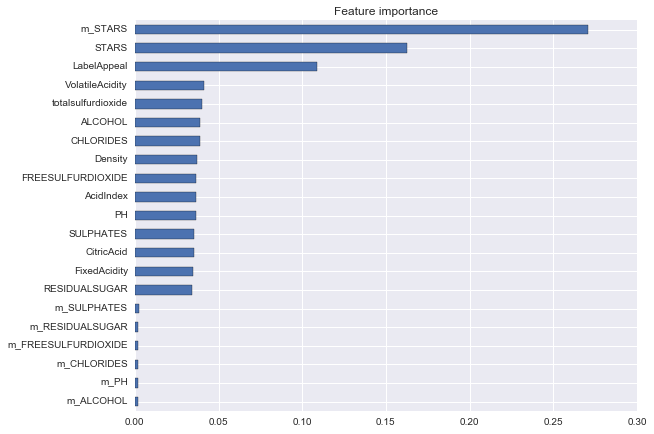

In [662]:
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_imp.sort_values(inplace=True, ascending=True)
feat_imp.plot(kind='barh', title='Feature importance')

# Gradient Boosted Regression Trees

In [666]:
X_train=wine_train.drop(['Selected','INDEX','TARGET','m_totalsulfurdioxide'],axis=1)
X_test=wine_test.drop(['Selected','INDEX','TARGET','m_totalsulfurdioxide'],axis=1)
Y_train=wine_train['TARGET']
Y_test=wine_test['TARGET']
RANDOM_STATE=5
parameters={'min_samples_split': 2,'n_estimators':300,'subsample':.75,
            'random_state':RANDOM_STATE, 'max_features':.6, 'max_depth':6}
clf = ensemble.GradientBoostingRegressor(**parameters)
parameters_grid={'learning_rate':[x/300.0 for x in range(2,11)]}
fitmodel = GridSearchCV(clf, param_grid=parameters_grid, cv=5, scoring="neg_mean_squared_error")
fitmodel.fit(X_train, Y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.cv_results_

(GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='ls', max_depth=6, max_features=0.6,
              max_leaf_nodes=None, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=5, subsample=0.75, verbose=0,
              warm_start=False),
 {'learning_rate': 0.02},
 -1.5242187616544787,
 {'mean_fit_time': array([ 5.00875101,  4.43136249,  4.40703559,  4.26528597,  4.15385437,
          4.04775252,  4.09359641,  4.06653638,  3.93594179]),
  'mean_score_time': array([ 0.03083043,  0.02670979,  0.02473121,  0.02481184,  0.0239778 ,
          0.02347612,  0.02257223,  0.02194638,  0.02129717]),
  'mean_test_score': array([-1.59487309, -1.54880496, -1.5328009 , -1.52541973, -1.52421876,
         -1.52454568, -1.52711543, -1.53208758, -1.53828586]),
  'mean_train_score': array([-1.31399567, -1.157176

In [667]:
parameters={'n_estimators': 300, 
            'max_depth': 6, 
            'min_samples_split': 2,
            'learning_rate': fitmodel.best_params_['learning_rate'], 'loss': 'ls',
            'subsample': .75,
            'max_features':.6, 'random_state':RANDOM_STATE}
gb= ensemble.GradientBoostingRegressor(**parameters)
gb.fit(X_train,Y_train)
pickle.dump(gb, open('Wine_GBRT.sav', 'wb'))

In [668]:
gb = pickle.load(open('Wine_GBRT.sav', 'rb'))
Y_pred=gb.predict(X_test)
rmse(Y_test,Y_pred)

1.2446930861797305

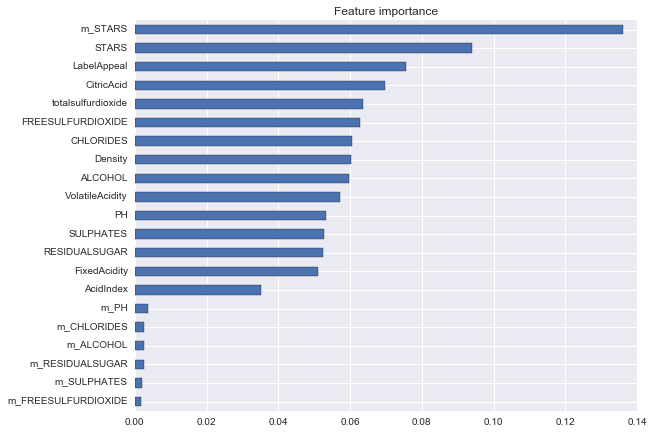

In [669]:
feat_imp = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_imp.sort_values(inplace=True, ascending=True)
feat_imp.plot(kind='barh', title='Feature importance')